In [1]:

import cv2
import statistics
import math
import matplotlib.pyplot as plt
import numpy as np
import time
import cmath
import bisect
clear = cv2.imread("../images/car1.jpg")
clear=cv2.resize(clear,(250,250))

(250, 250)


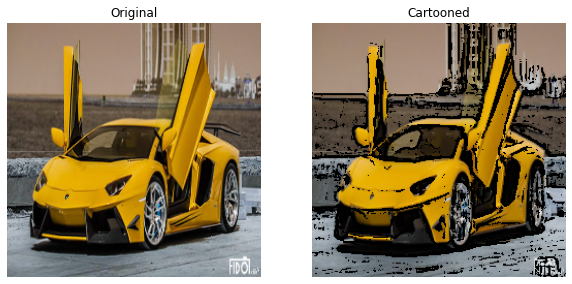

In [2]:
car = cv2.imread("../images/car1.jpg")
car=cv2.resize(car,(250,250))
gray = cv2.cvtColor(car, cv2.COLOR_BGR2GRAY)
def median(H,k):
    cs=np.cumsum(H)
    res=np.argmax(cs>k**2/2)
    return res
def OptMedFilt(im,k):
    pad=int(k/2)
    res=np.zeros(im.shape)
    n_im=np.pad(im,((pad,pad),(pad,pad)),'constant')
    h=[]
    for i in range(int(n_im.shape[1])):
        hist=cv2.calcHist(np.array([n_im[0:k,i]]),[0],None,[256],[0,256]).reshape(1,256)[0]
        h.append(hist)
    H=np.zeros(256)
    for i in range(0,k):
        H+=h[i]
    for i in range(int(im.shape[0])):
        for j in range(int(im.shape[1])):
            if i==0 and j==0:
                res[i,j]=median(H,k)
            elif i!=0 and j==0:
                for l in range(0,k):
                    h[l][n_im[i-1,l]]-=1
                    h[l][n_im[i+k-1,l]]=h[l][n_im[i+k-1,l]]+1
                H=np.zeros(256)
                for m in range(k):
                    H+=h[m]
                res[i,j]=median(H,k)
            elif j!=0:
                if i==0:
                    H=H+h[j+k-1]-h[j-1]
                else:
                    h[j+k-1][n_im[i-1,j+k-1]]-=1
                    h[j+k-1][n_im[i+k-1,j+k-1]]+=1
                    H=H+h[j+k-1]-h[j-1]
                res[i,j]=median(H,k)
    return res
blur = OptMedFilt(gray,7)

def thre(img,k1,con):
    print(img.shape)
    img2=np.ones((img.shape[0]-k1+1,img.shape[1]-k1+1))
    mask=np.ones((k1,k1))/(k1**2)
    temp=math.floor((k1-1)/2)
    for i in range(img2.shape[0]):
        for j in range(img2.shape[1]):
            sum_me=0
            if(img[i+temp][j+temp]+con < np.mean(img[i:i+k1,j:j+k1])):
                img2[i][j]=0
            else:
                img2[i][j]=255
            #print(sum_me)
    return img2

res = thre(blur,5,1.3)
clear=cv2.resize(clear,res.shape)
clear[res==0]=[0,0,0]

fig=plt.figure(figsize=[10,10])

ax = fig.add_subplot(1,2,1)
ax.set_title('Original')
ax.imshow(car)
plt.axis('off')

ax = fig.add_subplot(1,2,2)
ax.set_title('Cartooned')
ax.imshow(clear)
plt.axis('off')
plt.show()
